
National Greenhouse Gas Emissions Inventories by the sector of origin and National Mitigation Targets as determined by the countries.

Annual country-level estimates of net emissions/removals for 215 countries are presented by six sectors, 14 sub-sectors and four gases, for the years 1970-2021. To facilitate retrieval and use, two aggregated indicators, Total GHG emissions including land-use, land-use change and forestry (LULUCF) and Total GHG emissions excluding land-use, land-use change and forestry are presented in addition to the sector-level information.[link text](https://climatedata.imf.org/datasets/72e94bc71f4441d29710a9bea4d35f1d_0/about)

**Problem Statement:**
*Greenhouse gases such as carbon dioxide, methane, and nitrous oxide trap heat in the Earth's atmosphere, leading to climate change and its associated impacts, such as sea level rise, more frequent and severe weather events, and changes in ecosystems and biodiversity.*

**Business Understanding**


*   Businesses can have a significant impact on greenhouse gas emissions through their operations, supply chains, and products.


*   Understanding Greenhouse gas emissions is critical for businesses to make informed decisions about sustainability, risk management, and long-term viability. 

*  Comprehensive understanding of the sources and impacts of emissions across the entire value chain, from raw material extraction to end-of-life disposal. 


*   Compliance with regulatory requirements to reduce emissions, such as carbon taxes or emissions trading schemes.


*  Reducing emissions can lead to cost savings, increased efficiency, and improved brand reputation. 








 



###National Greenhouse Gas Emissions Inventories and Implied National Mitigation (Nationally Determined Contributions) Targets

Exploratory Data Analysis


##1. Import Libraries

In [1]:
# import necessary libraries
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.Reading the data

In [2]:
df=pd.read_csv('/content/National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_(Nationally_Determined_Contributions)_Targets.csv',error_bad_lines=False,engine="python")

<ipython-input-2-746a6854eec9>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('/content/National_Greenhouse_Gas_Emissions_Inventories_and_Implied_National_Mitigation_(Nationally_Determined_Contributions)_Targets.csv',error_bad_lines=False,engine="python")


In [3]:
# Determining the shape of the datset
df.shape

(20448, 74)

3.Data Cleaning

In [4]:
# Cleaning the missing data
empty_columns=df.isnull().sum()
empty_columns=empty_columns[empty_columns.values>(0.3*len(empty_columns))]
# listing the null values columns having more than 30%
print(empty_columns)

ISO2      2761
F1970     5281
F1971     5281
F1972     5281
F1973     5281
         ...  
F2026    19820
F2027    19820
F2028    19820
F2029    19820
F2030    17939
Length: 62, dtype: int64


In [5]:
# Searching for the column for null values
df.isnull().sum()/len(df)*100

ObjectId      0.000000
Country       0.000000
ISO2         13.502543
ISO3          0.000000
Indicator     0.000000
               ...    
F2026        96.928795
F2027        96.928795
F2028        96.928795
F2029        96.928795
F2030        87.729851
Length: 74, dtype: float64

If a column has a very high percentage of null values (e.g., more than 50%), and it is not critical to the analysis or prediction task, it may be appropriate to simply drop the column. Let's drop columns F2026,F2027,F2028,    F2029, F2030.               
        


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20448 entries, 0 to 20447
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             20448 non-null  int64  
 1   Country              20448 non-null  object 
 2   ISO2                 17687 non-null  object 
 3   ISO3                 20448 non-null  object 
 4   Indicator            20448 non-null  object 
 5   Unit                 20448 non-null  object 
 6   Source               20448 non-null  object 
 7   CTS_Code             20448 non-null  object 
 8   CTS_Name             20448 non-null  object 
 9   CTS_Full_Descriptor  20448 non-null  object 
 10  Industry             20448 non-null  object 
 11  Gas_Type             20448 non-null  object 
 12  Scale                20448 non-null  object 
 13  F1970                15167 non-null  float64
 14  F1971                15167 non-null  float64
 15  F1972                15167 non-null 

In [7]:
#Listing empty rows and removing rows greater than 30%
empty_rows=df.isnull().sum(axis=1)
empty_rows=list(empty_rows[empty_rows.values>=0.3*len(df)].index)
df.drop(labels=empty_rows,axis=0,inplace=True)
print(len(empty_rows))

0


Dropping ID,Source,Scale and Unit columns.


In [8]:
df.drop(['ObjectId','ISO2','ISO3','Indicator','Unit','Source','CTS_Code','CTS_Full_Descriptor','Scale','F2022','F2023','F2024','F2025','F2026','F2027','F2028','F2028','F2029','F2030'],axis=1,inplace=True)

High number of missing values - drop columns F2022 - F2030. Deleted the columns having 628 missing values.

In [9]:
df.isna().sum()
df.isnull().sum()/len(df)*100

Country      0.000000
CTS_Name     0.000000
Industry     0.000000
Gas_Type     0.000000
F1970       25.826487
F1971       25.826487
F1972       25.826487
F1973       25.826487
F1974       25.826487
F1975       25.826487
F1976       25.826487
F1977       25.826487
F1978       25.826487
F1979       25.826487
F1980       25.826487
F1981       25.826487
F1982       25.826487
F1983       25.826487
F1984       25.826487
F1985       25.826487
F1986       25.826487
F1987       25.826487
F1988       25.826487
F1989       25.826487
F1990       14.064945
F1991       14.064945
F1992       14.064945
F1993       14.064945
F1994       14.064945
F1995       14.064945
F1996       14.064945
F1997       14.064945
F1998       14.064945
F1999       14.064945
F2000       14.064945
F2001       14.064945
F2002       14.064945
F2003       14.064945
F2004       14.064945
F2005       14.064945
F2006       14.064945
F2007       14.064945
F2008       14.064945
F2009       14.064945
F2010       14.064945
F2011     

4.Imputing missing data

In [10]:
##Imputing the missing values with mean of the population
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='0']
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    mean_value=df[feature].mean()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(mean_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()
df
                    

,Country,CTS_Name,Industry,Gas_Type,F1970,F1971,F1972,F1973,F1974,F1975,...,F2012nan,F2013nan,F2014nan,F2015nan,F2016nan,F2017nan,F2018nan,F2019nan,F2020nan,F2021nan
0,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Carbon dioxide,20.880609,20.901782,21.075596,21.496603,21.582896,22.278924,...,0,0,0,0,0,0,0,0,0,0
1,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Greenhouse gas,1033.088228,1040.842816,1047.925600,1060.981516,1079.694780,1106.317706,...,0,0,0,0,0,0,0,0,0,0
2,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Methane,682.429285,683.556828,687.644816,693.622138,715.108070,721.979982,...,0,0,0,0,0,0,0,0,0,0
3,Advanced Economies,Annual Net Emissions/Removals,Agriculture,Nitrous oxide,329.778334,336.384206,339.205188,345.862775,343.003815,362.058800,...,0,0,0,0,0,0,0,0,0,0
4,Advanced Economies,Annual Net Emissions/Removals,Buildings and other Sectors,Carbon dioxide,1954.799942,1966.157204,2027.906735,2043.195965,1936.555406,1915.620128,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20443,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Not Applicable,Carbon dioxide,9.669320,9.616592,9.164476,10.612888,10.303574,9.088979,...,0,0,0,0,0,0,0,0,0,0
20444,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Not Applicable,Fluorinated gases,73.809895,73.757565,76.693835,80.526879,80.479529,80.312784,...,0,0,0,0,0,0,0,0,0,0
20445,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Not Applicable,Greenhouse gas,21.602987,22.181682,21.797037,23.376969,23.313291,22.656186,...,0,0,0,0,0,0,0,0,0,0
20446,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Not Applicable,Methane,8.267716,8.694284,8.713195,8.846898,9.006267,9.372119,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#No of countries involved
df['Country'].value_counts()

Advanced Economies        118
World                     118
G7                        117
G20                       117
Europe                    117
                         ... 
Gibraltar                  41
Anguilla                   41
Faroe Islands              34
International Shipping     20
International Air          18
Name: Country, Length: 236, dtype: int64

In [12]:
#No of industries involved
df['Industry'].value_counts()

Not Applicable                                    4775
Industrial Processes and Product Use              1001
Energy                                             943
Buildings and other Sectors                        934
Road Transportation                                932
Energy Industries                                  932
Manufacturing Industries and Construction          928
Fugitive Emissions from Fuels                      890
Agriculture                                        854
Domestic Aviation                                  836
Waste                                              821
Land-use, land-use change and forestry             818
Domestic Navigation                                744
Non-energy Products from Fuels and Solvent Use     712
Other Transportation                               655
Railways                                           571
Other                                              517
Metal Industry                                     478
Chemical I

In [13]:
#Count of Gas_typa acrros the globe
df['Gas_Type'].value_counts()

Greenhouse gas       4909
Carbon dioxide       4194
Nitrous oxide        4136
Methane              3654
Not Applicable       2523
Fluorinated gases    1032
Name: Gas_Type, dtype: int64

In [19]:
df.sort_values(['F2021'],ascending=False)[['Country','Gas_Type']]

,Country,Gas_Type
20206,World,Greenhouse gas
20201,World,Greenhouse gas
20189,World,Not Applicable
20188,World,Not Applicable
7107,G20,Greenhouse gas
...,...,...
7155,G7,Carbon dioxide
41,Advanced Economies,Greenhouse gas
40,Advanced Economies,Carbon dioxide
7039,G20,Greenhouse gas


In [21]:
df.groupby(['F2021']).max().sort_values(['F2021'],ascending=False)[['Country','Gas_Type','Industry']]

,Country,Gas_Type,Industry
F2021,,,
51928.150330,World,Greenhouse gas,Not Applicable
51402.523180,World,Greenhouse gas,Not Applicable
50728.346000,World,Not Applicable,Not Applicable
49733.469000,World,Not Applicable,Not Applicable
39462.186030,G20,Greenhouse gas,Not Applicable
...,...,...,...
-941.326490,G7,Carbon dioxide,"Land-use, land-use change and forestry"
-1010.776362,Advanced Economies,Greenhouse gas,"Land-use, land-use change and forestry"
-1119.770513,Advanced Economies,Carbon dioxide,"Land-use, land-use change and forestry"


In [32]:
#Locate the Maximum gas emitting country the globe
df.groupby(['Gas_Type']).max().sort_values(['Country','Industry','F2021'],ascending =False)

,Country,CTS_Name,Industry,F1970,F1971,F1972,F1973,F1974,F1975,F1976,...,F2012nan,F2013nan,F2014nan,F2015nan,F2016nan,F2017nan,F2018nan,F2019nan,F2020nan,F2021nan
Gas_Type,,,,,,,,,,,,,,,,,,,,,
Greenhouse gas,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,23988.390040,24029.324590,24956.056920,26173.971160,26209.583660,26243.319180,27381.733500,...,1,1,1,1,1,1,1,1,1,1
Carbon dioxide,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,16120.846940,16044.985080,16846.420430,17841.770660,17788.085300,17726.890290,18731.800770,...,1,1,1,1,1,1,1,1,1,1
Methane,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,6066.960500,6148.258211,6233.341748,6387.548676,6432.393527,6503.543882,6579.395002,...,1,1,1,1,1,1,1,1,1,1
Nitrous oxide,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,1657.607882,1681.294743,1711.391467,1765.125919,1795.389535,1822.030804,1870.478235,...,1,1,1,1,1,1,1,1,1,1
Fluorinated gases,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Product Uses as Substitutes for ODS,142.974716,154.786559,164.903281,179.525905,193.715304,190.854206,200.059488,...,1,1,1,1,1,1,1,1,1,1
Not Applicable,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Not Applicable,73.809895,73.757565,76.693835,80.526879,80.479529,80.312784,83.972439,...,1,1,1,1,1,1,1,1,1,1


Insights
 

*   Globally, Greenhouse emission is the highest from the list for Zimbabwe for
industrial waste. 

*   Extreme temperatures and dry spells intensified the drought conditions , leading to enormous social and economic loss across multiple sectors (e.g. Agriculture, Water, Energy, Forestry).

*   Unsustainable agricultural activities, resources extraction and wild fires caused major threats to wetlands.



In [34]:
#Locate the Minimum gas emitting country the globe
df.groupby(['Gas_Type']).max().sort_values(['Country','Industry','F2021'],ascending =False)

,Country,CTS_Name,Industry,F1970,F1971,F1972,F1973,F1974,F1975,F1976,...,F2012nan,F2013nan,F2014nan,F2015nan,F2016nan,F2017nan,F2018nan,F2019nan,F2020nan,F2021nan
Gas_Type,,,,,,,,,,,,,,,,,,,,,
Greenhouse gas,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,23988.390040,24029.324590,24956.056920,26173.971160,26209.583660,26243.319180,27381.733500,...,1,1,1,1,1,1,1,1,1,1
Carbon dioxide,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,16120.846940,16044.985080,16846.420430,17841.770660,17788.085300,17726.890290,18731.800770,...,1,1,1,1,1,1,1,1,1,1
Methane,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,6066.960500,6148.258211,6233.341748,6387.548676,6432.393527,6503.543882,6579.395002,...,1,1,1,1,1,1,1,1,1,1
Nitrous oxide,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Waste,1657.607882,1681.294743,1711.391467,1765.125919,1795.389535,1822.030804,1870.478235,...,1,1,1,1,1,1,1,1,1,1
Fluorinated gases,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Product Uses as Substitutes for ODS,142.974716,154.786559,164.903281,179.525905,193.715304,190.854206,200.059488,...,1,1,1,1,1,1,1,1,1,1
Not Applicable,Zimbabwe,Total GHG Emissions Including Land-Use and Lan...,Not Applicable,73.809895,73.757565,76.693835,80.526879,80.479529,80.312784,83.972439,...,1,1,1,1,1,1,1,1,1,1


Insights


*   Advanced economies adopts market-based strategies cap and trade and carbon tax to reduce emissions.
*  Use of Direct non-electricity fuel use in homes and industry. 

*   Reducing direct usage of fuels (e.g., natural gas) in homes, shops, factories, and offices. 

5.Univariate Analysis

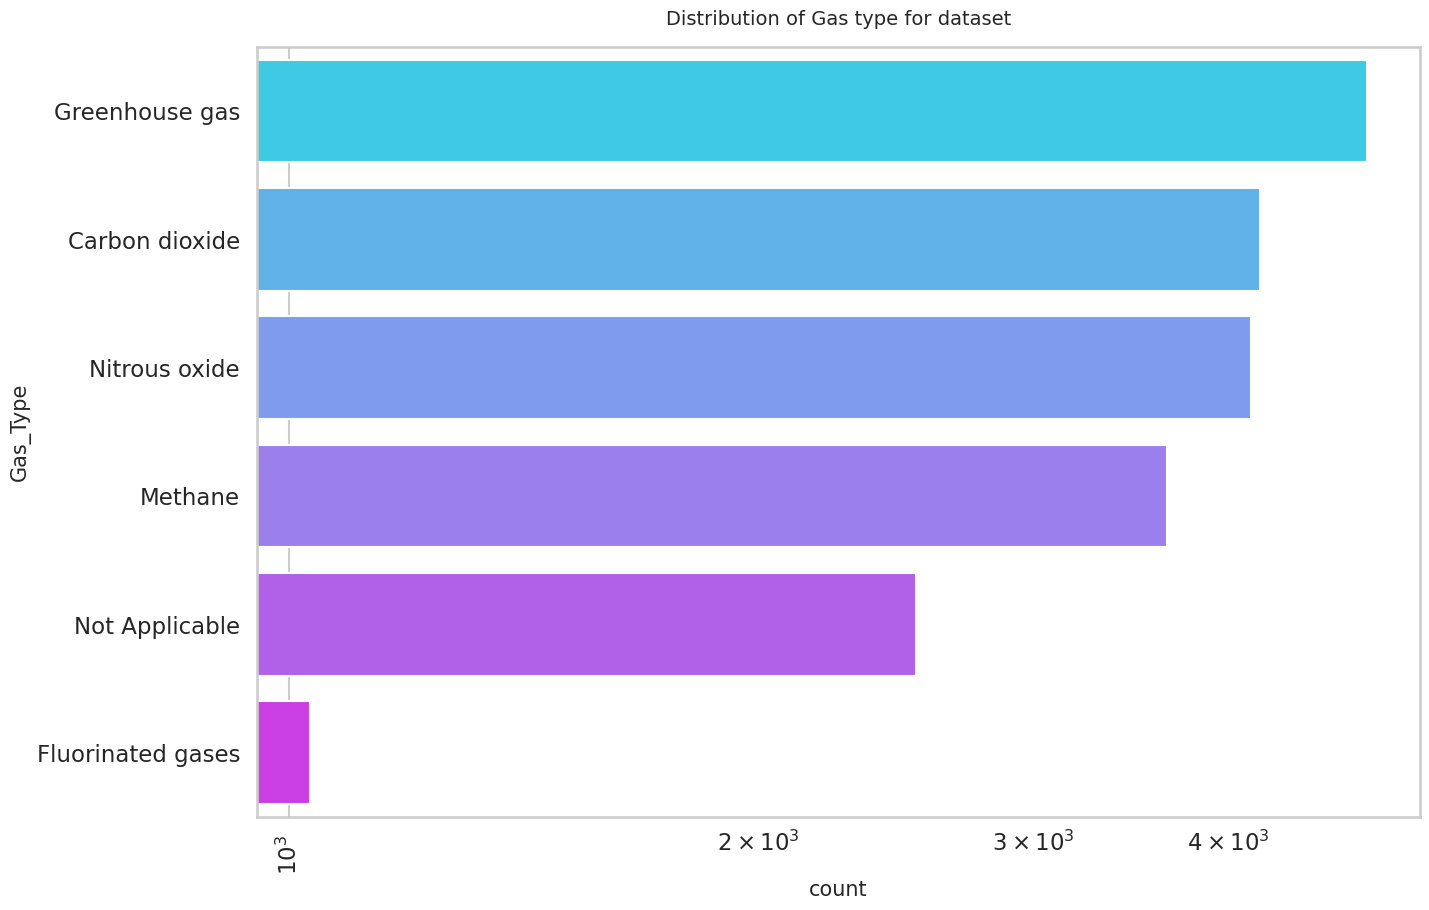

In [15]:
#Univariate analysis for categories
# Count plotting in logarithmic scale

# Plotting for gas distribution type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 16

plt.title("Distribution of Gas type for dataset")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df,y='Gas_Type',order=df['Gas_Type'].value_counts().index,palette='cool')

plt.show()

Data Insights
1. Increase in level of greenhouse gas indicating the  increased human activities such as the burning of fossil fuels, deforestation, and agriculture(> 10^3).
2.Carbon dioxide second most prevalent greenhouse gas and generated from the combustion of fossil fuels (coal, oil, and natural gas), deforestation, and other land-use changes, is a major contributor to climate change.
3.Nitrous oxide emitted from agricultural and industrial activities, as well as the combustion of fossil fuels and solid waste is the most contributor.

<Axes: title={'center': 'Distribution of Industry type for year 2021'}, xlabel='F2021', ylabel='Industry'>

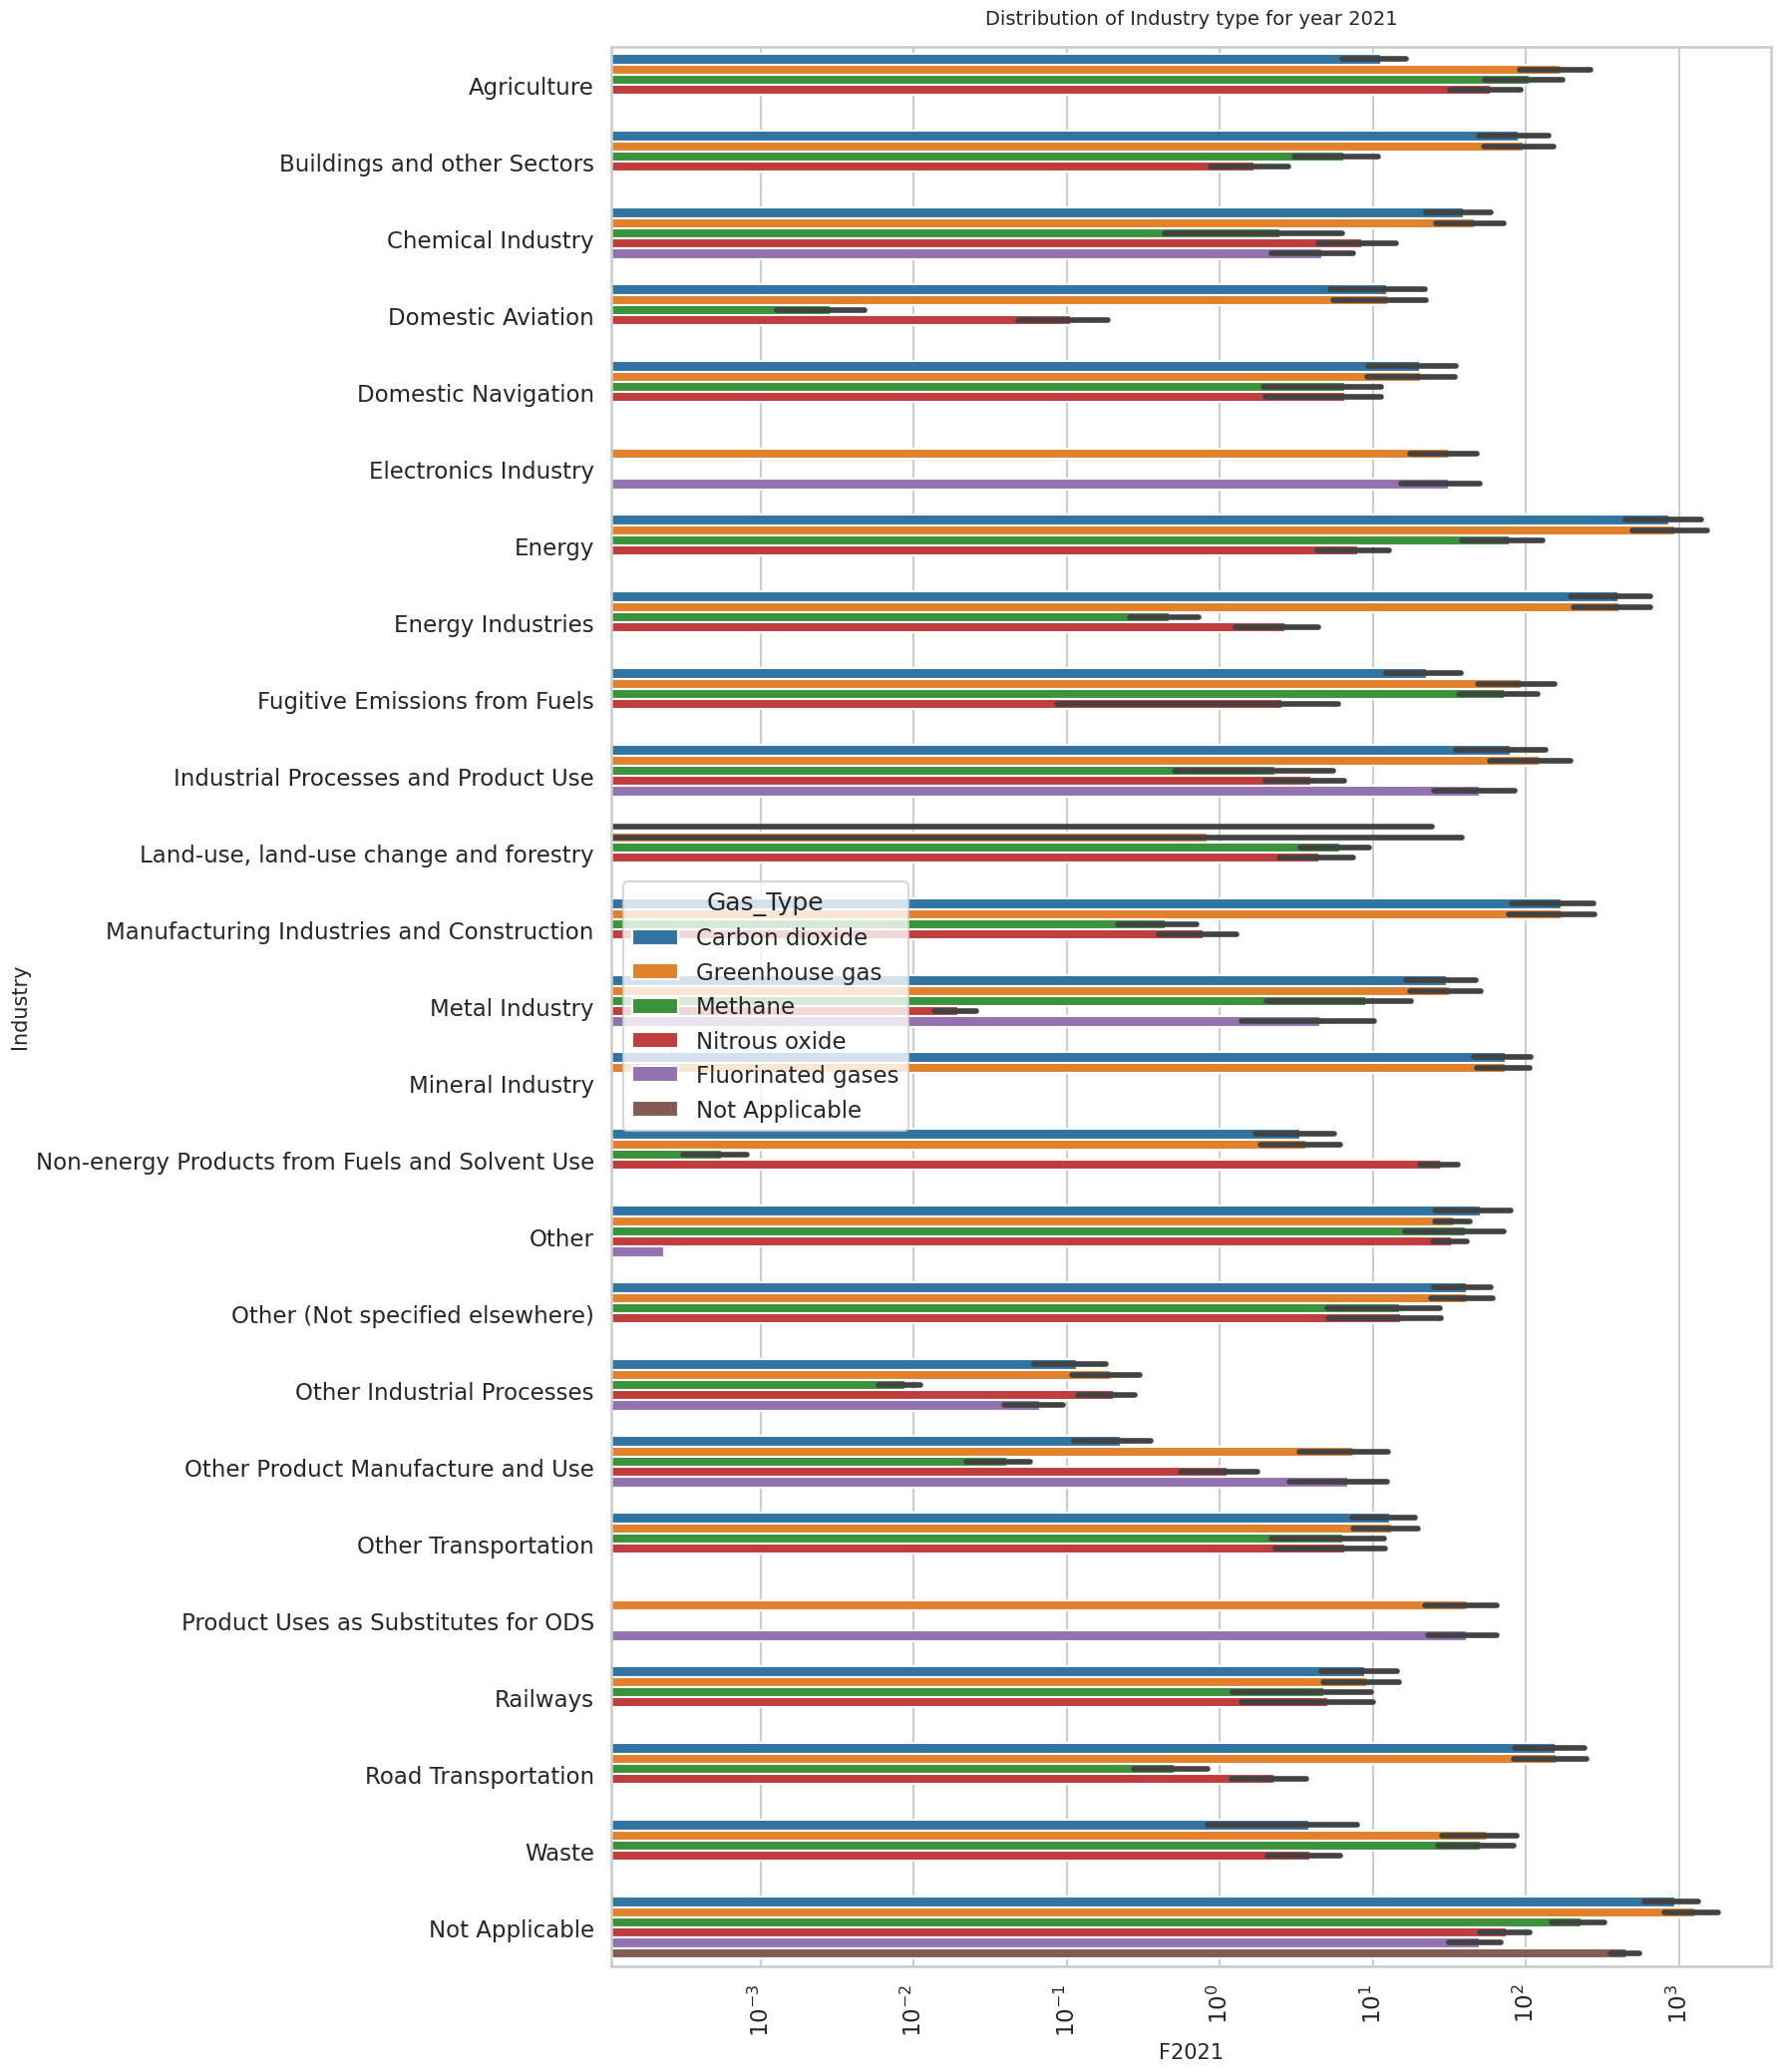

In [16]:
import seaborn as sns
plt.figure(figsize=(15,25))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titlepad'] = 16
plt.title("Distribution of Industry type for year 2021")

plt.xticks(rotation=90)
plt.xscale('log')

sns.barplot(data=df, x="F2021", y="Industry", hue="Gas_Type")

Insights

*   Max emission is from Energy production- 10^3: The burning of fossil fuels, such as coal, oil, and natural gas, for electricity generation, heating, and industrial processes is a major source of greenhouse gas emissions. Power plants and energy-intensive industries contribute significantly to carbon dioxide (CO2) emissions.
